In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network

import utils

In [2]:
def load_dataset_up_down(size, seed=39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2, size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2, size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

# The Perceptron

## Training with 100 points

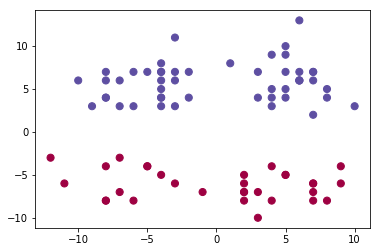

In [3]:
X, Y = load_dataset_up_down(80)
indices = np.argsort(Y)
X = X[indices]
Y = Y[indices]
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

In [4]:
clf = sklearn.linear_model.Perceptron(max_iter=5, random_state=1)
clf.fit(X, Y);

/Users/luisvargas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 100 


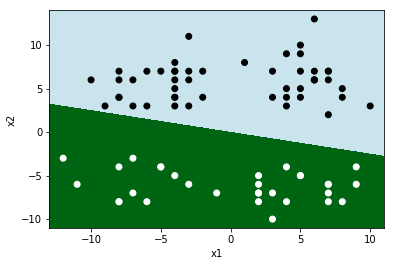

In [5]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

## Testing with more and more data

Accuracy: 99 


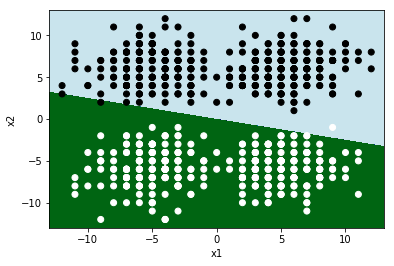

In [6]:
X, Y = load_dataset_up_down(800)
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

## Do you see a problem?
<br/><br/><br/><br/><br/>

## What if we train again (and again...)

/Users/luisvargas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


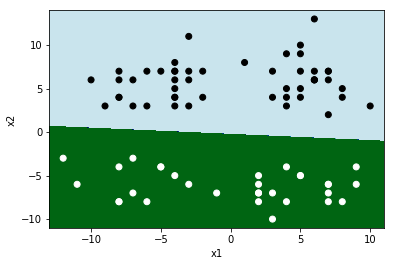

In [7]:
X, Y = load_dataset_up_down(80)
clf = sklearn.linear_model.Perceptron(max_iter=5, random_state=2)
clf.fit(X, Y)
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

/Users/luisvargas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


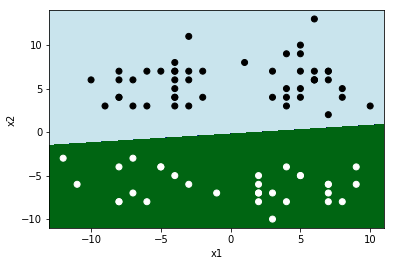

In [8]:
X, Y = load_dataset_up_down(80)
clf = sklearn.linear_model.Perceptron(max_iter=5, random_state=4)
clf.fit(X, Y)
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

## What is the problem? How could we fix it? 

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# And if data is not linearly separable?

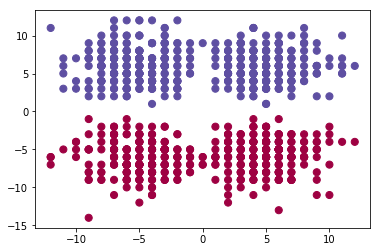

In [9]:
X, Y = load_dataset_up_down(1000)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

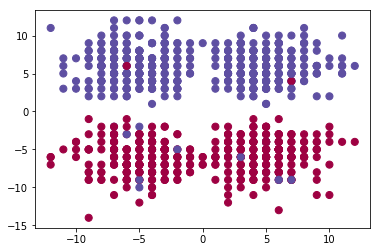

In [10]:
some_noise = np.random.binomial(1, .02, Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

In [11]:
clf = sklearn.linear_model.Perceptron(shuffle=False, max_iter=5, random_state=1)
clf.fit(X, Y);

/Users/luisvargas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 54 


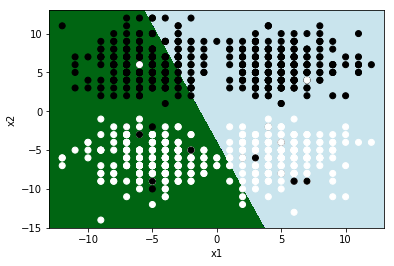

In [12]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

In [13]:
clf = sklearn.linear_model.Perceptron(shuffle=False, max_iter=100, random_state=10)
clf.fit(X, Y);

/Users/luisvargas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 48 


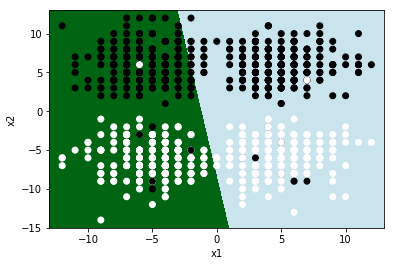

In [14]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

In [15]:
clf = sklearn.linear_model.Perceptron(max_iter=1)
clf.fit(X, Y);

/Users/luisvargas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 91 


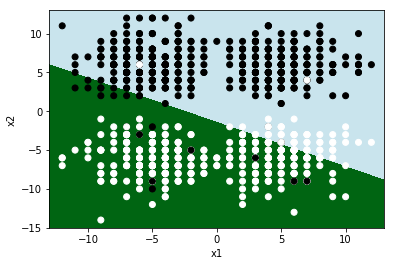

In [16]:
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))